Классический ROC-AUC равен:

$\frac{1}{N_0*N_1}*\sum_{i,j: t_i=1, t_j=0} ([y_i > y_j] + \frac{1}{2}*[y_i=y_j])$

где $t_i, t_j$ — правильные ответы (бинарные) для объектов $i$ и $j$, $N_0, N_1$  - количества 0 и 1 среди правильных ответов соответственно, а $y_i, y_j$ — предсказания модели для объектов $i$ и $j$. Рассмотрим обобщённый AUC, который определён не только для бинарных ответов:

$\frac{\sum_{i,j: t_i > t_j} ([y_i > y_j] + \frac{1}{2}*[y_i=y_j])}{|\{i,j: t_i > t_j\}|}$

Даны массив правильных ответов и массив предсказаний модели.

Необходимо посчитать обобщённый AUC.

**Формат ввода**

В первой строке указано одно число $N$ — число объектов в выборке $(2⩽N⩽100000)$. В каждой из следующих $N$ строк указаны два вещественных числа (с точностью не более 6 цифр после десятичной точки): правильный ответ примера $t_i$ и предсказание модели $y_i$ для этого примера.

Гарантируется, что существуют два таких номера $i$ и $j$, что $t_i \neq t_j$.

**Формат вывода**

Выведите одно число (значение обобщённого AUC) с точностью как минимум 6 значащих цифр после десятичной точки.

## Пример 1

**Ввод**<br>
2<br>
0 0<br>
1 1<br>
**Вывод**<br>
1.000000<br>

## Пример 2

**Ввод**<br>
2<br>
0 1<br>
1 0<br>
**Вывод**<br>
0.000000<br>

## Пример 3

**Ввод**<br>
3<br>
0.5 0<br>
0.5 1<br>
2 0.5<br>
**Вывод**<br>
0.500000<br>

## Пример 4

**Ввод**<br>
7<br>
0 0<br>
0 1<br>
1 2<br>
0 3<br>
1 4<br>
1 5<br>
1 6<br>
**Вывод**<br>
0.916667<br>

## Пример 5

**Ввод**<br>
10<br>
0 4<br>
3 0<br>
1 2<br>
2 4<br>
1 0<br>
2 1<br>
4 1<br>
2 1<br>
4 4<br>
0 0<br>
**Вывод**<br>
0.538462<br>

## Пример 6

**Ввод**<br>
10<br>
3 4<br>
3 4<br>
2 1<br>
3 2<br>
4 1<br>
0 2<br>
2 0<br>
1 2<br>
4 4<br>
3 3<br>
**Вывод**<br>
0.648649<br>

По сути самое просто решение, перебрать все пары точек и просто найти все случаи, когда $t_i > t_j$ и $y_i > y_j$, но тогда сложность алгоритма будет $O(N^2)$ и оно будет превышать лимит времени.

In [ ]:
# первое решение, которое перебирает все пары точек и ищет нужные пары
# но решение не проходит по времени
import numpy as np
from itertools import combinations

def generalized_roc_auc(data):
    data = data[data[:, 0].argsort()][::-1]
    combs = list(combinations(data,2))

    s = 0
    k = 0
    for comb in combs:
        if comb[0][0] > comb[1][0]:
            s += (comb[0][1] > comb[1][1]) + 1/2 * (comb[0][1] == comb[1][1])
            k += 1

    return round(s/k, 6)

n = int(input())
train = []
for i in range(n):
    train.append(list(map(float, input().split())))

train = np.array(train)
print(generalized_roc_auc(train))

In [ ]:
# второе решение немного модернизированное первое, оно не проходит по времени
import numpy as np

def numpy_comb(x):
    idx = np.stack(np.triu_indices(len(x), k=1), axis=-1)
    x = x[idx]
    x = x[x[:, 0, 0] > x[:, 1, 0]]
    return x

n = int(input())
train = [list(map(float, input().split())) for i in range(n)]

data = np.array(train)
data = data[data[:, 0].argsort()][::-1]
combs = numpy_comb(data)

result = (sum(combs[:, 0, 1] > combs[:, 1, 1]) + sum(1/2*(combs[:, 0, 1] == combs[:, 1, 1])))/len(combs)

print(round(result,6))

Более элегантное решение состоит в том, чтобы попробовать решить задачу геометрически:

ось X - это $t_i$, ось Y - это $y_i$.

Таким образом, двигаясь слева направо по оси X для фиксированного $X=t_i$ все точки слева будут удовлетворять условию $t_i>t_j$ и нам просто нужно рассчитать количество точек, которые также удовлетворяют условию $y_i>y_j$.

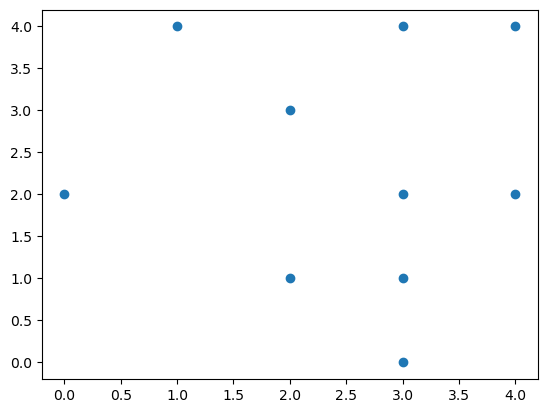

In [1]:
# рассмотрим пример
import matplotlib.pyplot as plt
n = 10
t = [3,3,2,3,4,0,2,1,4,3]
y = [4,4,1,2,1,2,0,2,4,3]

y_sorted = sorted(y)

plt.scatter(t, y_sorted)

In [ ]:
# решение которое проходит
from bisect import bisect_left, bisect_right

n = int(input())
t, y = zip(*sorted(tuple(map(float, input().split())) for i in range(n)))
y_sorted = sorted(y)

nom = denom = 0
i = n - 1

while i >= 0:
    j = i
    while j >= 0 and t[i] == t[j]:
        l = bisect_left(y_sorted, y[j])
        y_sorted.pop(l)
        j -= 1

    for k in range(j + 1, i + 1):
        l = bisect_left(y_sorted, y[k])
        r = bisect_right(y_sorted, y[k])
        nom += l + (r - l) / 2
        denom += j + 1

    i = j

print(nom / denom)